# Visualizations Draft Page 
#### - Sam

To view source code for this page, visit our repo @ https://github.com/sam-thurman/dsc-mod-1-project-seattle-ds and navigate to `src/viz_scripts/numeric_visualizations.py`

In [1]:
!ls

01_erh_download_and_explore_data.ipynb opportunity_youth.sqlite
02_Mihir_Exploratory.ipynb             oy_by_age.csv
02_samt_exploratory.ipynb              oy_by_education.csv
02_samt_v2_exploratory.ipynb           oy_df.csv
Kyle_Exploration.ipynb                 oy_df_16_18.csv
README.md                              oy_df_19_21.csv
age_data.csv                           oy_df_22_24.csv
ay_df.csv                              project_outcomes.ipynb
ay_df_16_18.csv                        racial_data.csv
ay_df_19_21.csv                        ry_df.csv
ay_df_22_24.csv                        ry_df_16_18.csv
kyle_the_seconding.ipynb               ry_df_19_21.csv
opportunity_youth                      ry_df_22_24.csv


Check conda environment:

In [2]:
!which python

/Users/sam/opt/anaconda3/envs/oy-env/bin/python


In [3]:
%load_ext autoreload
%autoreload 2

Import tools:

In [4]:
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data import data_collection

Import scripts:

In [5]:
import src.viz_scripts.numeric_visualization as viz

In [6]:
full_dfs, racial_df, age_df_dict, oy_by_age_df, oy_by_education = viz.import_and_assign()

## VIZ: 
#### OY in 2016 vs. 2020

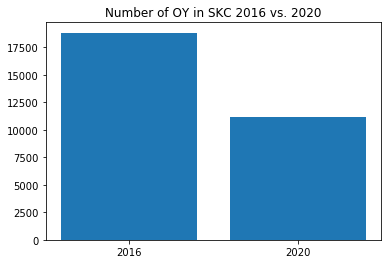

In [7]:
viz.plot_16_v_20(full_dfs)

## VIZ:
#### OY by Age

Gathering required variables:

In [8]:
ay_age_group_val_list, oy_age_group_val_list, oy_percentage_of_age_pop, age_group_strings = viz.get_age_plot_reqs(age_df_dict)

Plot just percent:

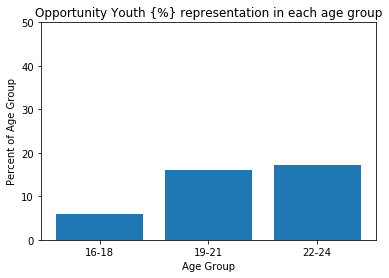

In [9]:
viz.plot_percent_oy_by_age(oy_percentage_of_age_pop, age_group_strings)

Plot percent **and** OY & AY stats by age

In [10]:
ay_age_group_val_list = [age_df_dict['total_youth'][0]['pwgtp'].sum(),
                          age_df_dict['total_youth'][1]['pwgtp'].sum(),
                          age_df_dict['total_youth'][2]['pwgtp'].sum()]

oy_age_group_val_list = [age_df_dict['opportunity_youth'][0]['pwgtp'].sum(),
                          age_df_dict['opportunity_youth'][1]['pwgtp'].sum(),
                          age_df_dict['opportunity_youth'][2]['pwgtp'].sum()]
oy_percentage_of_age_pop = [int(o) / int(y) for o,y in zip(oy_age_group_val_list, ay_age_group_val_list)]
oy_percentage_of_age_pop = [x*100 for x in oy_percentage_of_age_pop]
oy_percentage_of_age_pop

[6.021698019309246, 16.020560307619867, 17.242860920148072]

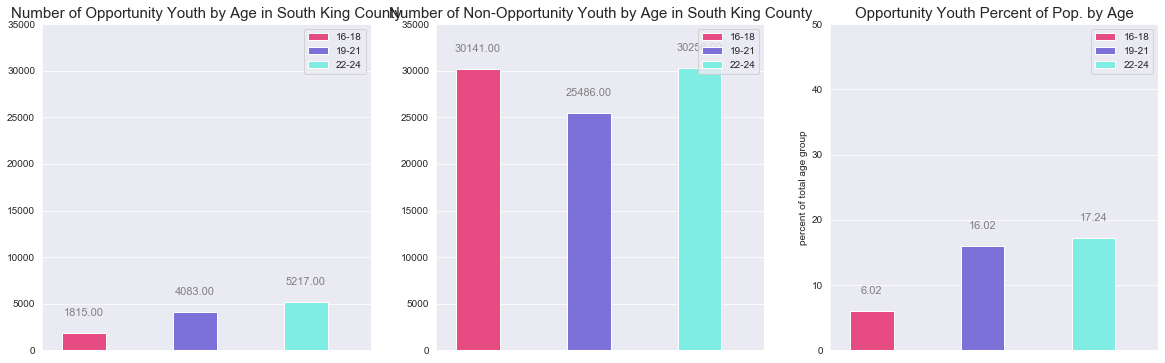

In [24]:
viz.plot_in_depth_age(age_df_dict)

## VIZ:
#### OY by Race

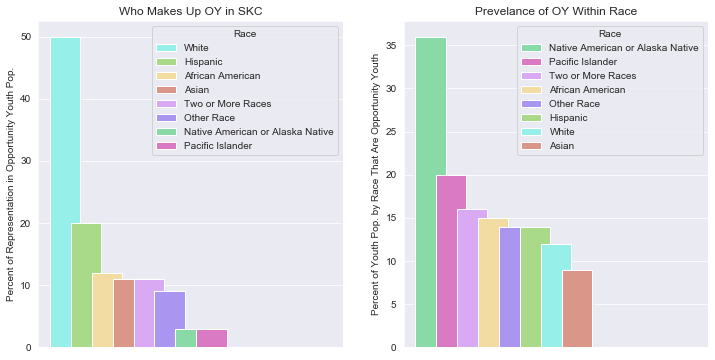

In [12]:
viz.plot_racial_representation(racial_df)

## VIZ:
#### total pop. diploma/work status by age

In [27]:
oy_by_education

,unnamed: 0,group,16_18_%,16_18_values,19_21_%,19_21_values,22_24_%,22_24_values,totals_%,totals_values
0,0,Opportunity Youth,100,1815.0,100,4083.0,100,5217.0,100,11115.0
1,1,No Diploma,50,916.0,28,1135.0,27,1391.0,31,3442.0
2,2,HS or GED,43,781.0,53,2183.0,45,2325.0,48,5289.0
3,3,"Some College, No Degree",7,118.0,16,649.0,21,1074.0,17,1841.0
4,4,College Degree (associates+),0,0.0,3,116.0,8,427.0,5,543.0


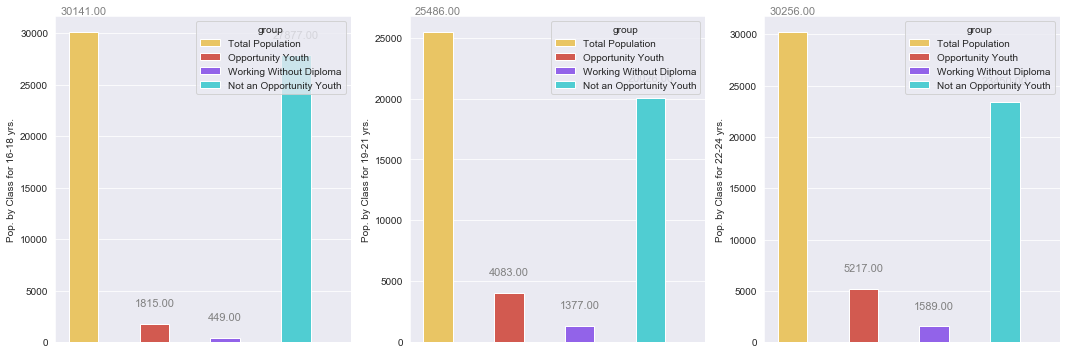

In [26]:
viz.plot_working_diploma_status(oy_by_age_df)

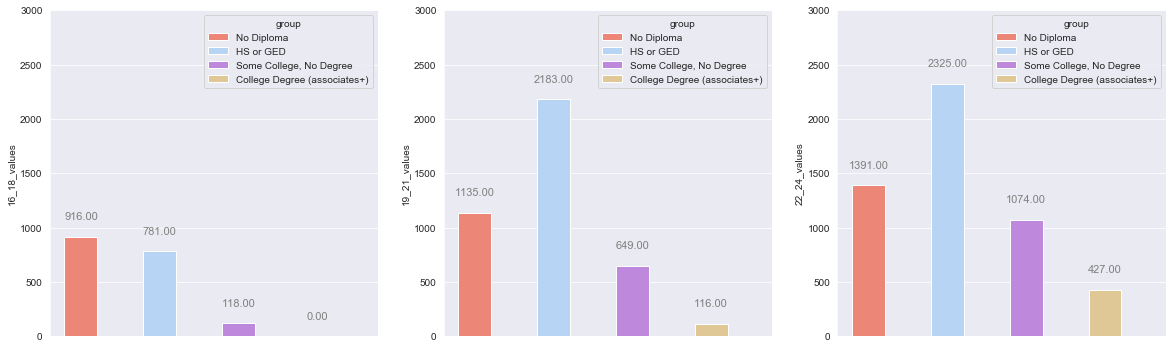

In [32]:
viz.plot_oy_education_breakdown_2020(oy_by_education)